In [1]:
# FILE UPLOAD

from google.colab import files
uploaded = files.upload()

Saving zomato.csv to zomato.csv


In [2]:
# LOADING THE DATASET TO A DATAFRAME

import pandas as pd

df = pd.read_csv("zomato.csv", encoding='latin-1')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# DATA CLEANING AND PREPROCESSING
# 1. Handle Missing Values

df.dropna(inplace=True)

In [4]:
# DATA CLEANING AND PREPROCESSING
# 2. Removing Duplicates

df.drop_duplicates(inplace=True)

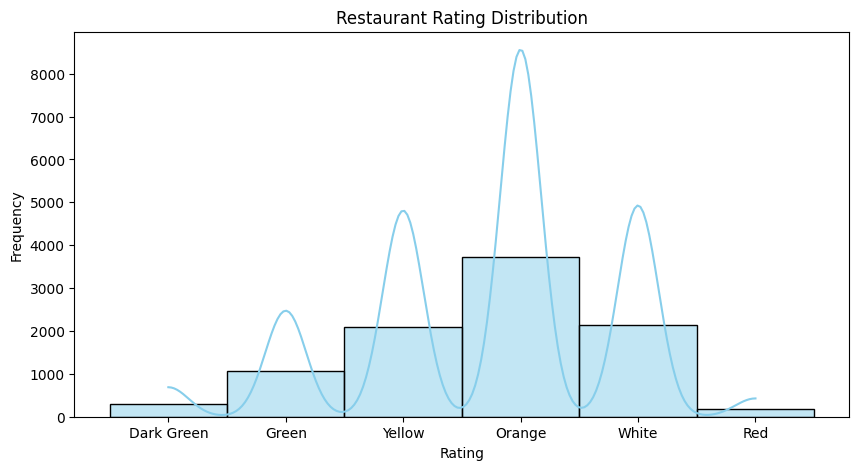

In [36]:
# DATA ANALYSIS/EXPLORATION
# 1. Rating Distribution

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['Rating color'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Restaurant Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

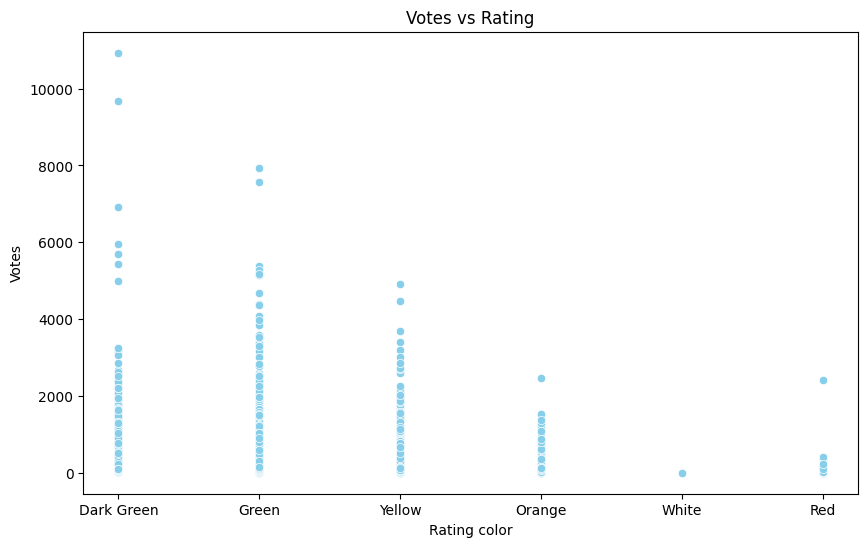

In [35]:
# DATA ANALYSIS/EXPLORATION
# 2. Voting vs Rating

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating color', y='Votes', data=df, color='skyblue')
plt.title("Votes vs Rating")
plt.show()

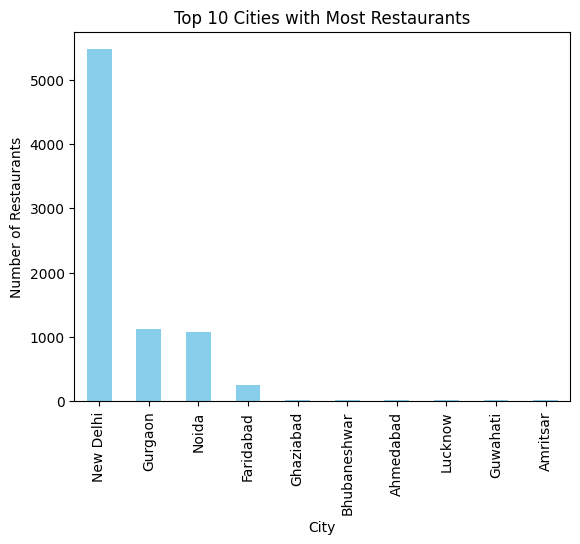

In [34]:
# GROUPING BY CITY AND CUISINE TYPE
# 1. Top Cities by Number of Restaurants

top_cities = df['City'].value_counts().head(10)
top_cities.plot(kind='bar', color='skyblue')
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
# plt.xticks(rotation=45)
plt.show()

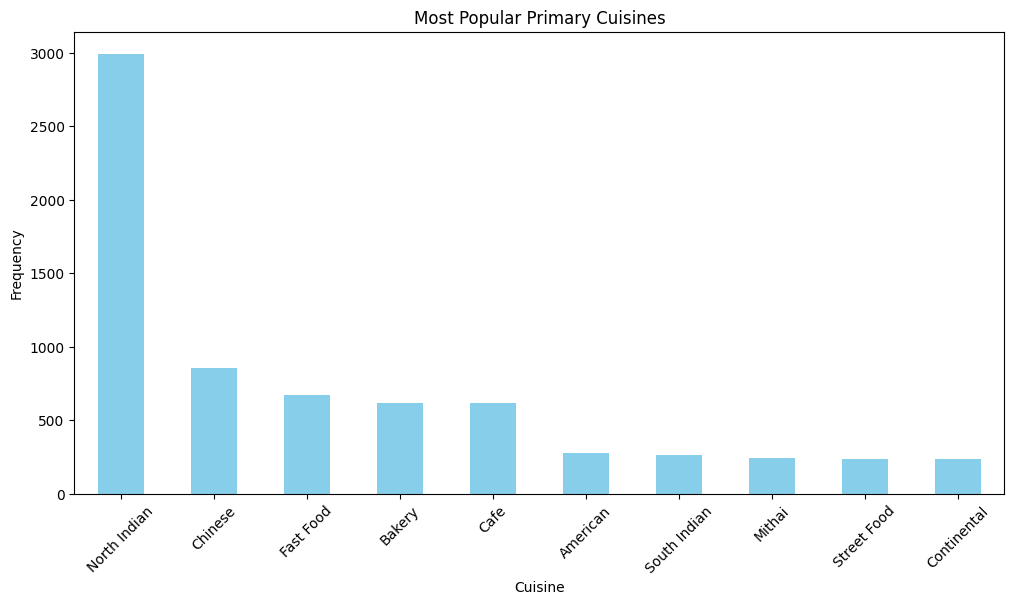

In [33]:
# GROUPING BY CITY AND CUISINE
# 2. Top Cities by Number of Restaurants

from collections import Counter

cuisines = df['Cuisines'].dropna().apply(lambda x: x.split(',')[0])  # take primary cuisine
plt.figure(figsize=(12, 6))
cuisines.value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Most Popular Primary Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

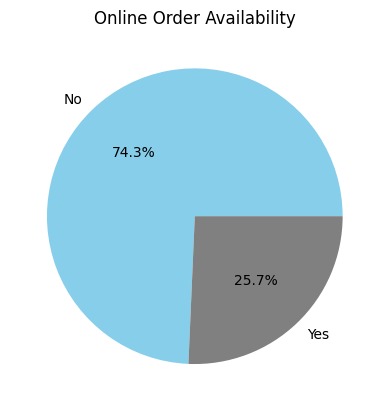

In [32]:
# DELIVERY AND DINE-IN ANALYSIS
# 1. Online Order Availability

df['Has Online delivery'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'grey'])
plt.title("Online Order Availability")
plt.ylabel("")
plt.show()

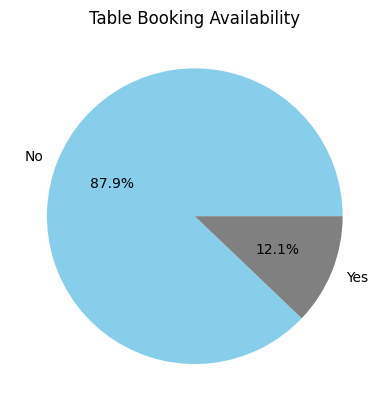

In [31]:
# DELIVERY AND DINE-IN ANALYSIS
# 2. Table Booking Availability

df['Has Table booking'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'gray'])
plt.title("Table Booking Availability")
plt.ylabel("")
plt.show()

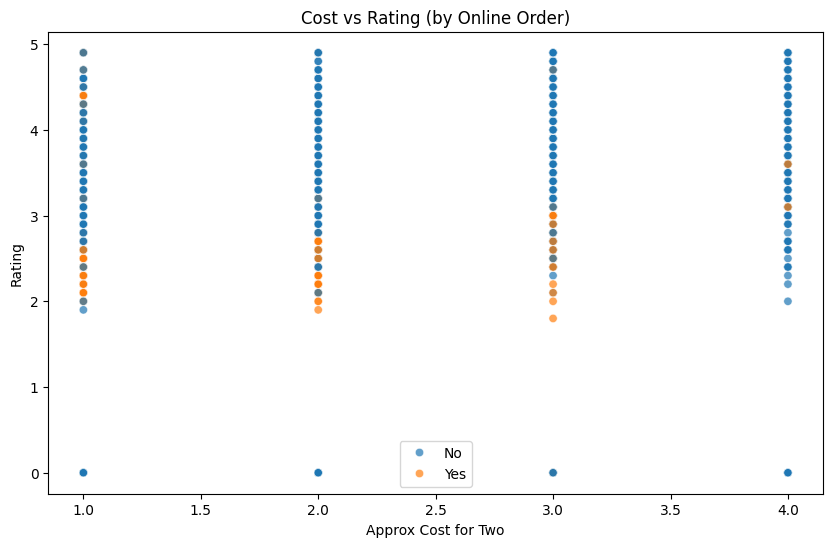

In [39]:
# PRICE Vs RATING

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price range', y='Aggregate rating', data=df, hue='Has Online delivery', alpha=0.7)
plt.title("Cost vs Rating (by Online Order)")
plt.xlabel("Approx Cost for Two")
plt.ylabel("Rating")
plt.legend()
plt.show()

In [45]:
# TOP RATED RESTAURANTS PER CITY

top_rated = df[df['Aggregate rating'] >= 4.5]
top_rated = top_rated[top_rated['Votes'] >= 100]
top_per_city = top_rated.groupby('City').apply(lambda x: x.nlargest(1, 'Aggregate rating'))[['Restaurant Name', 'Aggregate rating', 'Votes']]
print(top_per_city.to_string(index=False))

                         Restaurant Name  Aggregate rating  Votes
                            Punjab Grill               4.9    216
                                Cryo Lab               4.6    166
                         Pizza ÛÁl Forno               4.7    104
                               Sr. Sol 1               4.6    917
                                   Milse               4.9    754
                      Rae's Coastal Cafe               4.9    548
                                    Toit               4.8  10934
                     Bridge Road Brewers               4.6    237
                   Sagar Gaire Fast Food               4.9    427
                         Barbeque Nation               4.6    154
                                  Bodega               4.6    100
           Flatbread Neapolitan Pizzeria               4.6    615
                                 Jarryds               4.8    319
                 Shorts Burger and Shine               4.9    820
          

/tmp/ipython-input-45-3888643684.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_per_city = top_rated.groupby('City').apply(lambda x: x.nlargest(1, 'Aggregate rating'))[['Restaurant Name', 'Aggregate rating', 'Votes']]
